# Honey Production
Now that we have learned how linear regression works, let’s try it on an example of real-world data.

As we may have already heard, the honeybees are in a precarious state right now. We may have seen articles about the decline of the honeybee population for various reasons. We want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Check out the Data

In [3]:
df = pd.read_csv('honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [11]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
x = prod_per_year['year']
y = prod_per_year['totalprod']

prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


Text(0.5, 1.0, 'Mean Production per Year')

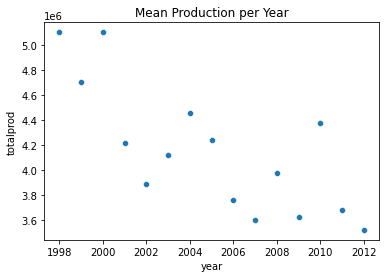

In [18]:
sns.scatterplot(data=prod_per_year,x='year',y='totalprod' )
plt.title('Mean Production per Year')

We see a vaguely linear relationship between these variables .

# Create and Fit a Linear Regression Model

In [15]:
model = LinearRegression()
model.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))


LinearRegression()

Text(0.5, 1.0, 'Mean Predicted Production per Year')

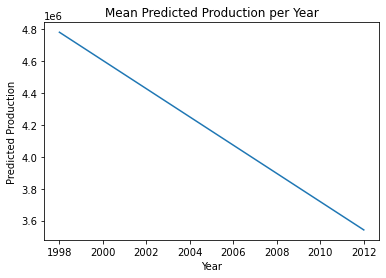

In [22]:
y_predict = model.predict(np.array(x).reshape(-1,1))
plt.plot(x,y_predict)
x = prod_per_year['year']
plt.xlabel('Year')
plt.ylabel('Predicted Production')
plt.title('Mean Predicted Production per Year')


So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

# Predict the Honey Decline

Text(0.5, 1.0, 'Mean Predicted Production per Future Year')

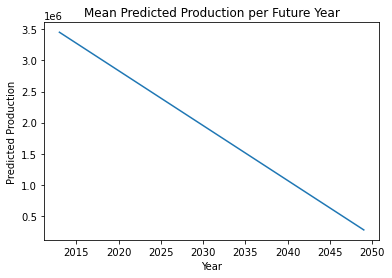

In [27]:
X_future = np.array(range(2013,2050)).reshape(-1,1)
Y_future = model.predict(X_future)
plt.plot(X_future,Y_future)
plt.xlabel('Year')
plt.ylabel('Predicted Production')
plt.title('Mean Predicted Production per Future Year')

Acoording to our model the Average Honey Production will be less than 0.5